In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import random
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lxmxl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.lda import LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [4]:
import datetime
def get_trading_date(df):
    dates = []
    for i in range(len(df)):
        date = df.loc[i]["date"]
        time = df.loc[i]["time"]
        if datetime.datetime.strptime(time, '%I:%M %p') < datetime.datetime.strptime("4:00 PM", '%I:%M %p'):
            dates.append(date)
        else:
            date = datetime.datetime.strftime((datetime.datetime.strptime(date, '%Y-%m-%d') + datetime.timedelta(days=1)), '%Y-%m-%d')
            dates.append(date)
    return dates

In [7]:
def sentiment(combinedNews):
    uncertain_string = "ABEYANCE,ABEYANCES,ALMOST,ALTERATION,ALTERATIONS,AMBIGUITIES,AMBIGUITY,AMBIGUOUS,ANOMALIES,ANOMALOUS,ANOMALOUSLY,ANOMALY,ANTICIPATE,ANTICIPATED,ANTICIPATES,ANTICIPATING,ANTICIPATION,ANTICIPATIONS,APPARENT,APPARENTLY,APPEAR,APPEARED,APPEARING,APPEARS,APPROXIMATE,APPROXIMATED,APPROXIMATELY,APPROXIMATES,APPROXIMATING,APPROXIMATION,APPROXIMATIONS,ARBITRARILY,ARBITRARINESS,ARBITRARY,ASSUME,ASSUMED,ASSUMES,ASSUMING,ASSUMPTION,ASSUMPTIONS,BELIEVE,BELIEVED,BELIEVES,BELIEVING,,CAUTIOUS,CAUTIOUSLY,CAUTIOUSNESS,CLARIFICATION,CLARIFICATIONS,CONCEIVABLE,CONCEIVABLY,CONDITIONAL,CONDITIONALLY,CONFUSES,CONFUSING,CONFUSINGLY,CONFUSION,CONTINGENCIES,CONTINGENCY,CONTINGENT,CONTINGENTLY,CONTINGENTS,COULD,CROSSROAD,CROSSROADS,DEPEND,DEPENDED,DEPENDENCE,DEPENDENCIES,DEPENDENCY,DEPENDENT,DEPENDING,DEPENDS,DESTABILIZING,DEVIATE,DEVIATED,DEVIATES,DEVIATING,DEVIATION,DEVIATIONS,DIFFER,DIFFERED,DIFFERING,DIFFERS,DOUBT,DOUBTED,DOUBTFUL,DOUBTS,EXPOSURE,EXPOSURES,,FLUCTUATE,FLUCTUATED,FLUCTUATES,FLUCTUATING,FLUCTUATION,FLUCTUATIONS,HIDDEN,HINGES,IMPRECISE,IMPRECISION,IMPRECISIONS,IMPROBABILITY,IMPROBABLE,INCOMPLETENESS,INDEFINITE,INDEFINITELY,INDEFINITENESS,INDETERMINABLE,INDETERMINATE,INEXACT,INEXACTNESS,INSTABILITIES,INSTABILITY,INTANGIBLE,INTANGIBLES,LIKELIHOOD,MAY,MAYBE,MIGHT,NEARLY,NONASSESSABLE,OCCASIONALLY,ORDINARILY,PENDING,PERHAPS,POSSIBILITIES,POSSIBILITY,POSSIBLE,POSSIBLY,PRECAUTION,PRECAUTIONARY,PRECAUTIONS,PREDICT,PREDICTABILITY,PREDICTED,PREDICTING,,PREDICTION,PREDICTIONS,PREDICTIVE,PREDICTOR,PREDICTORS,PREDICTS,PRELIMINARILY,PRELIMINARY,PRESUMABLY,PRESUME,PRESUMED,PRESUMES,PRESUMING,PRESUMPTION,PRESUMPTIONS,PROBABILISTIC,PROBABILITIES,PROBABILITY,PROBABLE,PROBABLY,RANDOM,RANDOMIZE,RANDOMIZED,RANDOMIZES,RANDOMIZING,RANDOMLY,RANDOMNESS,REASSESS,REASSESSED,REASSESSES,REASSESSING,REASSESSMENT,REASSESSMENTS,RECALCULATE,RECALCULATED,RECALCULATES,RECALCULATING,RECALCULATION,RECALCULATIONS,RECONSIDER,RECONSIDERED,RECONSIDERING,RECONSIDERS,REEXAMINATION,REEXAMINE,REEXAMINING,,REINTERPRET,REINTERPRETATION,REINTERPRETATIONS,REINTERPRETED,REINTERPRETING,REINTERPRETS,REVISE,REVISED,RISK,RISKED,RISKIER,RISKIEST,RISKINESS,RISKING,RISKS,RISKY,ROUGHLY,RUMORS,SEEMS,SELDOM,SELDOMLY,SOMETIME,SOMETIMES,SOMEWHAT,SOMEWHERE,SPECULATE,SPECULATED,SPECULATES,SPECULATING,SPECULATION,SPECULATIONS,SPECULATIVE,SPECULATIVELY,SPORADIC,SPORADICALLY,SUDDEN,SUDDENLY,SUGGEST,SUGGESTED,SUGGESTING,SUGGESTS,SUSCEPTIBILITY,TENDING,TENTATIVE,TENTATIVELY,TURBULENCE,,UNCERTAIN,UNCERTAINLY,UNCERTAINTIES,UNCERTAINTY,UNCLEAR,UNCONFIRMED,UNDECIDED,UNDEFINED,UNDESIGNATED,UNDETECTABLE,UNDETERMINABLE,UNDETERMINED,UNDOCUMENTED,UNEXPECTED,UNEXPECTEDLY,UNFAMILIAR,UNFAMILIARITY,UNFORECASTED,UNFORSEEN,UNGUARANTEED,UNHEDGED,UNIDENTIFIABLE,UNIDENTIFIED,UNKNOWN,UNKNOWNS,UNOBSERVABLE,UNPLANNED,UNPREDICTABILITY,UNPREDICTABLE,UNPREDICTABLY,UNPREDICTED,UNPROVED,UNPROVEN,UNQUANTIFIABLE,UNQUANTIFIED,UNRECONCILED,UNSEASONABLE,UNSEASONABLY,UNSETTLED,UNSPECIFIC,UNSPECIFIED,UNTESTED,UNUSUAL,UNUSUALLY,UNWRITTEN,VAGARIES,,VAGUE,VAGUELY,VAGUENESS,VAGUENESSES,VAGUER,VAGUEST,VARIABILITY,VARIABLE,VARIABLES,VARIABLY,VARIANCE,VARIANCES,VARIANT,VARIANTS,VARIATION,VARIATIONS,VARIED,VARIES,VARY,VARYING,VOLATILE,VOLATILITIES,VOLATILITY"

    positive_string = "ABLE,ABUNDANCE,ABUNDANT,ACCLAIMED,ACCOMPLISH,ACCOMPLISHED,ACCOMPLISHES,ACCOMPLISHING,ACCOMPLISHMENT,ACCOMPLISHMENTS,ACHIEVE,ACHIEVED,ACHIEVEMENT,ACHIEVEMENTS,ACHIEVES,ACHIEVING,ADEQUATELY,ADVANCEMENT,ADVANCEMENTS,ADVANCES,ADVANCING,ADVANTAGE,ADVANTAGED,ADVANTAGEOUS,ADVANTAGEOUSLY,ADVANTAGES,ALLIANCE,ALLIANCES,ASSURE,ASSURED,ASSURES,ASSURING,ATTAIN,ATTAINED,ATTAINING,ATTAINMENT,ATTAINMENTS,ATTAINS,ATTRACTIVE,ATTRACTIVENESS,BEAUTIFUL,BEAUTIFULLY,BENEFICIAL,BENEFICIALLY,,BENEFIT,BENEFITED,BENEFITING,BENEFITTED,BENEFITTING,BEST,BETTER,BOLSTERED,BOLSTERING,BOLSTERS,BOOM,BOOMING,BOOST,BOOSTED,BREAKTHROUGH,BREAKTHROUGHS,BRILLIANT,CHARITABLE,COLLABORATE,COLLABORATED,COLLABORATES,COLLABORATING,COLLABORATION,COLLABORATIONS,COLLABORATIVE,COLLABORATOR,COLLABORATORS,COMPLIMENT,COMPLIMENTARY,COMPLIMENTED,COMPLIMENTING,COMPLIMENTS,CONCLUSIVE,CONCLUSIVELY,CONDUCIVE,CONFIDENT,CONSTRUCTIVE,CONSTRUCTIVELY,COURTEOUS,CREATIVE,CREATIVELY,CREATIVENESS,CREATIVITY,DELIGHT,DELIGHTED,DELIGHTFUL,,DELIGHTFULLY,DELIGHTING,DELIGHTS,DEPENDABILITY,DEPENDABLE,DESIRABLE,DESIRED,DESPITE,DESTINED,DILIGENT,DILIGENTLY,DISTINCTION,DISTINCTIONS,DISTINCTIVE,DISTINCTIVELY,DISTINCTIVENESS,DREAM,EASIER,EASILY,EASY,EFFECTIVE,EFFICIENCIES,EFFICIENCY,EFFICIENT,EFFICIENTLY,EMPOWER,EMPOWERED,EMPOWERING,EMPOWERS,ENABLE,ENABLED,ENABLES,ENABLING,ENCOURAGED,ENCOURAGEMENT,ENCOURAGES,ENCOURAGING,ENHANCE,ENHANCED,ENHANCEMENT,ENHANCEMENTS,ENHANCES,ENHANCING,ENJOY,ENJOYABLE,ENJOYABLY,,ENJOYED,ENJOYING,ENJOYMENT,ENJOYS,ENTHUSIASM,ENTHUSIASTIC,ENTHUSIASTICALLY,EXCELLENCE,EXCELLENT,EXCELLING,EXCELS,EXCEPTIONAL,EXCEPTIONALLY,EXCITED,EXCITEMENT,EXCITING,EXCLUSIVE,EXCLUSIVELY,EXCLUSIVENESS,EXCLUSIVES,EXCLUSIVITY,EXEMPLARY,FANTASTIC,FAVORABLE,FAVORABLY,FAVORED,FAVORING,FAVORITE,FAVORITES,FRIENDLY,GAIN,GAINED,GAINING,GAINS,GOOD,GREAT,GREATER,GREATEST,GREATLY,GREATNESS,HAPPIEST,HAPPILY,HAPPINESS,HAPPY,HIGHEST,HONOR,,HONORABLE,HONORED,HONORING,HONORS,IDEAL,IMPRESS,IMPRESSED,IMPRESSES,IMPRESSING,IMPRESSIVE,IMPRESSIVELY,IMPROVE,IMPROVED,IMPROVEMENT,IMPROVEMENTS,IMPROVES,IMPROVING,INCREDIBLE,INCREDIBLY,INFLUENTIAL,INFORMATIVE,INGENUITY,INNOVATE,INNOVATED,INNOVATES,INNOVATING,INNOVATION,INNOVATIONS,INNOVATIVE,INNOVATIVENESS,INNOVATOR,INNOVATORS,INSIGHTFUL,INSPIRATION,INSPIRATIONAL,INTEGRITY,INVENT,INVENTED,INVENTING,INVENTION,INVENTIONS,INVENTIVE,INVENTIVENESS,INVENTOR,INVENTORS,LEADERSHIP,,LEADING,LOYAL,LUCRATIVE,MERITORIOUS,OPPORTUNITIES,OPPORTUNITY,OPTIMISTIC,OUTPERFORM,OUTPERFORMED,OUTPERFORMING,OUTPERFORMS,PERFECT,PERFECTED,PERFECTLY,PERFECTS,PLEASANT,PLEASANTLY,PLEASED,PLEASURE,PLENTIFUL,POPULAR,POPULARITY,POSITIVE,POSITIVELY,PREEMINENCE,PREEMINENT,PREMIER,PREMIERE,PRESTIGE,PRESTIGIOUS,PROACTIVE,PROACTIVELY,PROFICIENCY,PROFICIENT,PROFICIENTLY,PROFITABILITY,PROFITABLE,PROFITABLY,PROGRESS,PROGRESSED,PROGRESSES,PROGRESSING,PROSPERED,PROSPERING,PROSPERITY,PROSPEROUS,,PROSPERS,REBOUND,REBOUNDED,REBOUNDING,RECEPTIVE,REGAIN,REGAINED,REGAINING,RESOLVE,REVOLUTIONIZE,REVOLUTIONIZED,REVOLUTIONIZES,REVOLUTIONIZING,REWARD,REWARDED,REWARDING,REWARDS,SATISFACTION,SATISFACTORILY,SATISFACTORY,SATISFIED,SATISFIES,SATISFY,SATISFYING,SMOOTH,SMOOTHING,SMOOTHLY,SMOOTHS,SOLVES,SOLVING,SPECTACULAR,SPECTACULARLY,STABILITY,STABILIZATION,STABILIZATIONS,STABILIZE,STABILIZED,STABILIZES,STABILIZING,STABLE,STRENGTH,STRENGTHEN,STRENGTHENED,STRENGTHENING,STRENGTHENS,STRENGTHS,,STRONG,STRONGER,STRONGEST,SUCCEED,SUCCEEDED,SUCCEEDING,,SUCCEEDS,SUCCESS,SUCCESSES,SUCCESSFUL,SUCCESSFULLY,SUPERIOR,SURPASS,SURPASSED,SURPASSES,SURPASSING,TRANSPARENCY,TREMENDOUS,TREMENDOUSLY,UNMATCHED,UNPARALLELED,UNSURPASSED,UPTURN,UPTURNS,VALUABLE,VERSATILE,VERSATILITY,VIBRANCY,VIBRANT,WIN,WINNER,WINNERS,WINNING,WORTHY"
    positive_string = positive_string.lower()
    negative_string = "ABANDON,ABANDONED,ABANDONING,ABANDONMENT,ABANDONMENTS,ABANDONS,ABDICATED,ABDICATES,ABDICATING,ABDICATION,ABDICATIONS,ABERRANT,ABERRATION,ABERRATIONAL,ABERRATIONS,ABETTING,ABNORMAL,ABNORMALITIES,ABNORMALITY,ABNORMALLY,ABOLISH,ABOLISHED,ABOLISHES,ABOLISHING,ABROGATE,ABROGATED,ABROGATES,ABROGATING,ABROGATION,ABROGATIONS,ABRUPT,ABRUPTLY,ABRUPTNESS,ABSENCE,ABSENCES,ABSENTEEISM,ABUSE,ABUSED,ABUSES,ABUSING,ABUSIVE,ABUSIVELY,ABUSIVENESS,ACCIDENT,,ACCIDENTAL,ACCIDENTALLY,ACCIDENTS,ACCUSATION,ACCUSATIONS,ACCUSE,ACCUSED,ACCUSES,ACCUSING,ACQUIESCE,ACQUIESCED,ACQUIESCES,ACQUIESCING,ACQUIT,ACQUITS,ACQUITTAL,ACQUITTALS,ACQUITTED,ACQUITTING,ADULTERATE,ADULTERATED,ADULTERATING,ADULTERATION,ADULTERATIONS,ADVERSARIAL,ADVERSARIES,ADVERSARY,ADVERSE,ADVERSELY,ADVERSITIES,ADVERSITY,AFTERMATH,AFTERMATHS,AGAINST,AGGRAVATE,AGGRAVATED,AGGRAVATES,AGGRAVATING,AGGRAVATION,AGGRAVATIONS,ALERTED,ALERTING,ALIENATE,ALIENATED,ALIENATES,ALIENATING,,ALIENATION,ALIENATIONS,ALLEGATION,ALLEGATIONS,ALLEGE,ALLEGED,ALLEGEDLY,ALLEGES,ALLEGING,ANNOY,ANNOYANCE,ANNOYANCES,ANNOYED,ANNOYING,ANNOYS,ANNUL,ANNULLED,ANNULLING,ANNULMENT,ANNULMENTS,ANNULS,ANOMALIES,ANOMALOUS,ANOMALOUSLY,ANOMALY,ANTICOMPETITIVE,ANTITRUST,ARGUE,ARGUED,ARGUING,ARGUMENT,ARGUMENTATIVE,ARGUMENTS,ARREARAGE,ARREARAGES,ARREARS,ARREST,ARRESTED,ARRESTS,ARTIFICIALLY,ASSAULT,ASSAULTED,ASSAULTING,ASSAULTS,ASSERTIONS,ATTRITION,,AVERSELY,BACKDATING,BAD,BAIL,BAILOUT,BALK,BALKED,BANKRUPT,BANKRUPTCIES,BANKRUPTCY,BANKRUPTED,BANKRUPTING,BANKRUPTS,BANS,BARRED,BARRIER,BARRIERS,BOTTLENECK,BOTTLENECKS,BOYCOTT,BOYCOTTED,BOYCOTTING,BOYCOTTS,BREACH,BREACHED,BREACHES,BREACHING,BREAK,BREAKAGE,BREAKAGES,BREAKDOWN,BREAKDOWNS,BREAKING,BREAKS,BRIBE,BRIBED,BRIBERIES,BRIBERY,BRIBES,BRIBING,BRIDGE,BROKEN,BURDEN,BURDENED,BURDENING,BURDENS,,BURDENSOME,BURNED,CALAMITIES,CALAMITOUS,CALAMITY,CANCEL,CANCELED,CANCELING,CANCELLATION,CANCELLATIONS,CANCELLED,CANCELLING,CANCELS,CARELESS,CARELESSLY,CARELESSNESS,CATASTROPHE,CATASTROPHES,CATASTROPHIC,CATASTROPHICALLY,CAUTION,CAUTIONARY,CAUTIONED,CAUTIONING,CAUTIONS,CEASE,CEASED,CEASES,CEASING,CENSURE,CENSURED,CENSURES,CENSURING,CHALLENGE,CHALLENGED,CHALLENGES,CHALLENGING,CHARGEOFFS,CIRCUMVENT,CIRCUMVENTED,CIRCUMVENTING,CIRCUMVENTION,CIRCUMVENTIONS,CIRCUMVENTS,CLAIMING,CLAIMS,,CLAWBACK,CLOSED,CLOSEOUT,CLOSEOUTS,CLOSING,CLOSINGS,CLOSURE,CLOSURES,COERCE,COERCED,COERCES,COERCING,COERCION,COERCIVE,COLLAPSE,COLLAPSED,COLLAPSES,COLLAPSING,COLLISION,COLLISIONS,COLLUDE,COLLUDED,COLLUDES,COLLUDING,COLLUSION,COLLUSIONS,COLLUSIVE,COMPLAIN,COMPLAINED,COMPLAINING,COMPLAINS,COMPLAINT,COMPLAINTS,COMPLICATE,COMPLICATED,COMPLICATES,COMPLICATING,COMPLICATION,COMPLICATIONS,COMPULSION,CONCEALED,CONCEALING,CONCEDE,CONCEDED,CONCEDES,CONCEDING,,CONCERN,CONCERNED,CONCERNS,CONCILIATING,CONCILIATION,CONCILIATIONS,CONDEMN,CONDEMNATION,CONDEMNATIONS,CONDEMNED,CONDEMNING,CONDEMNS,CONDONE,CONDONED,CONFESS,CONFESSED,CONFESSES,CONFESSING,CONFESSION,CONFINE,CONFINED,CONFINEMENT,CONFINEMENTS,CONFINES,CONFINING,CONFISCATE,CONFISCATED,CONFISCATES,CONFISCATING,CONFISCATION,CONFISCATIONS,CONFLICT,CONFLICTED,CONFLICTING,CONFLICTS,CONFRONT,CONFRONTATION,CONFRONTATIONAL,CONFRONTATIONS,CONFRONTED,CONFRONTING,CONFRONTS,CONFUSE,CONFUSED,CONFUSES,CONFUSING,,CONFUSINGLY,CONFUSION,CONSPIRACIES,CONSPIRACY,CONSPIRATOR,CONSPIRATORIAL,CONSPIRATORS,CONSPIRE,CONSPIRED,CONSPIRES,CONSPIRING,CONTEMPT,CONTEND,CONTENDED,CONTENDING,CONTENDS,CONTENTION,CONTENTIONS,CONTENTIOUS,CONTENTIOUSLY,CONTESTED,CONTESTING,CONTRACTION,CONTRACTIONS,CONTRADICT,CONTRADICTED,CONTRADICTING,CONTRADICTION,CONTRADICTIONS,CONTRADICTORY,CONTRADICTS,CONTRARY,CONTROVERSIAL,CONTROVERSIES,CONTROVERSY,CONVICT,CONVICTED,CONVICTING,CONVICTION,CONVICTIONS,CORRECTED,CORRECTING,CORRECTION,CORRECTIONS,CORRECTS,CORRUPT,,CORRUPTED,CORRUPTING,CORRUPTION,CORRUPTIONS,CORRUPTLY,CORRUPTNESS,COSTLY,COUNTERCLAIM,COUNTERCLAIMED,COUNTERCLAIMING,COUNTERCLAIMS,COUNTERFEIT,COUNTERFEITED,COUNTERFEITER,COUNTERFEITERS,COUNTERFEITING,COUNTERFEITS,COUNTERMEASURE,COUNTERMEASURES,CRIME,CRIMES,CRIMINAL,CRIMINALLY,CRIMINALS,CRISES,CRISIS,CRITICAL,CRITICALLY,CRITICISM,CRITICISMS,CRITICIZE,CRITICIZED,CRITICIZES,CRITICIZING,CRUCIAL,CRUCIALLY,CULPABILITY,CULPABLE,CULPABLY,CUMBERSOME,CURTAIL,CURTAILED,CURTAILING,CURTAILMENT,CURTAILMENTS,CURTAILS,,CUT,CUTBACK,CUTBACKS,CYBERATTACK,CYBERATTACKS,CYBERBULLYING,CYBERCRIME,CYBERCRIMES,CYBERCRIMINAL,CYBERCRIMINALS,DAMAGE,DAMAGED,DAMAGES,DAMAGING,DAMPEN,DAMPENED,DANGER,DANGEROUS,DANGEROUSLY,DANGERS,DEADLOCK,DEADLOCKED,DEADLOCKING,DEADLOCKS,DEADWEIGHT,DEADWEIGHTS,DEBARMENT,DEBARMENTS,DEBARRED,DECEASED,DECEIT,DECEITFUL,DECEITFULNESS,DECEIVE,DECEIVED,DECEIVES,DECEIVING,DECEPTION,DECEPTIONS,DECEPTIVE,DECEPTIVELY,DECLINE,DECLINED,DECLINES,DECLINING,DEFACE,,DEFACED,DEFACEMENT,DEFAMATION,DEFAMATIONS,DEFAMATORY,DEFAME,DEFAMED,DEFAMES,DEFAMING,DEFAULT,DEFAULTED,DEFAULTING,DEFAULTS,DEFEAT,DEFEATED,DEFEATING,DEFEATS,DEFECT,DEFECTIVE,DEFECTS,DEFEND,DEFENDANT,DEFENDANTS,DEFENDED,DEFENDING,DEFENDS,DEFENSIVE,DEFER,DEFICIENCIES,DEFICIENCY,DEFICIENT,DEFICIT,DEFICITS,DEFRAUD,DEFRAUDED,DEFRAUDING,DEFRAUDS,DEFUNCT,DEGRADATION,DEGRADATIONS,DEGRADE,DEGRADED,DEGRADES,DEGRADING,DELAY,DELAYED,,DELAYING,DELAYS,DELETERIOUS,DELIBERATE,DELIBERATED,DELIBERATELY,DELINQUENCIES,DELINQUENCY,DELINQUENT,DELINQUENTLY,DELINQUENTS,DELIST,DELISTED,DELISTING,DELISTS,DEMISE,DEMISED,DEMISES,DEMISING,DEMOLISH,DEMOLISHED,DEMOLISHES,DEMOLISHING,DEMOLITION,DEMOLITIONS,DEMOTE,DEMOTED,DEMOTES,DEMOTING,DEMOTION,DEMOTIONS,DENIAL,DENIALS,DENIED,DENIES,DENIGRATE,DENIGRATED,DENIGRATES,DENIGRATING,DENIGRATION,DENY,DENYING,DEPLETE,DEPLETED,DEPLETES,DEPLETING,,DEPLETION,DEPLETIONS,DEPRECATION,DEPRESS,DEPRESSED,DEPRESSES,DEPRESSING,DEPRIVATION,DEPRIVE,DEPRIVED,DEPRIVES,DEPRIVING,DERELICT,DERELICTION,DEROGATORY,DESTABILIZATION,DESTABILIZE,DESTABILIZED,DESTABILIZING,DESTROY,DESTROYED,DESTROYING,DESTROYS,DESTRUCTION,DESTRUCTIVE,DETAIN,DETAINED,DETENTION,DETENTIONS,DETER,DETERIORATE,DETERIORATED,DETERIORATES,DETERIORATING,DETERIORATION,DETERIORATIONS,DETERRED,DETERRENCE,DETERRENCES,DETERRENT,DETERRENTS,DETERRING,DETERS,DETRACT,DETRACTED,DETRACTING,,DETRIMENT,DETRIMENTAL,DETRIMENTALLY,DETRIMENTS,DEVALUE,DEVALUED,DEVALUES,DEVALUING,DEVASTATE,DEVASTATED,DEVASTATING,DEVASTATION,DEVIATE,DEVIATED,DEVIATES,DEVIATING,DEVIATION,DEVIATIONS,DEVOLVE,DEVOLVED,DEVOLVES,DEVOLVING,DIFFICULT,DIFFICULTIES,DIFFICULTLY,DIFFICULTY,DIMINISH,DIMINISHED,DIMINISHES,DIMINISHING,DIMINUTION,DISADVANTAGE,DISADVANTAGED,DISADVANTAGEOUS,DISADVANTAGES,DISAFFILIATION,DISAGREE,DISAGREEABLE,DISAGREED,DISAGREEING,DISAGREEMENT,DISAGREEMENTS,DISAGREES,DISALLOW,DISALLOWANCE,DISALLOWANCES,,DISALLOWED,DISALLOWING,DISALLOWS,DISAPPEAR,DISAPPEARANCE,DISAPPEARANCES,DISAPPEARED,DISAPPEARING,DISAPPEARS,DISAPPOINT,DISAPPOINTED,DISAPPOINTING,DISAPPOINTINGLY,DISAPPOINTMENT,DISAPPOINTMENTS,DISAPPOINTS,DISAPPROVAL,DISAPPROVALS,DISAPPROVE,DISAPPROVED,DISAPPROVES,DISAPPROVING,DISASSOCIATES,DISASSOCIATING,DISASSOCIATION,DISASSOCIATIONS,DISASTER,DISASTERS,DISASTROUS,DISASTROUSLY,DISAVOW,DISAVOWAL,DISAVOWED,DISAVOWING,DISAVOWS,DISCIPLINARY,DISCLAIM,DISCLAIMED,DISCLAIMER,DISCLAIMERS,DISCLAIMING,DISCLAIMS,DISCLOSE,DISCLOSED,DISCLOSES,DISCLOSING,,DISCONTINUANCE,DISCONTINUANCES,DISCONTINUATION,DISCONTINUATIONS,DISCONTINUE,DISCONTINUED,DISCONTINUES,DISCONTINUING,DISCOURAGE,DISCOURAGED,DISCOURAGES,DISCOURAGING,DISCREDIT,DISCREDITED,DISCREDITING,DISCREDITS,DISCREPANCIES,DISCREPANCY,DISFAVOR,DISFAVORED,DISFAVORING,DISFAVORS,DISGORGE,DISGORGED,DISGORGEMENT,DISGORGEMENTS,DISGORGES,DISGORGING,DISGRACE,DISGRACEFUL,DISGRACEFULLY,DISHONEST,DISHONESTLY,DISHONESTY,DISHONOR,DISHONORABLE,DISHONORABLY,DISHONORED,DISHONORING,DISHONORS,DISINCENTIVES,DISINTERESTED,DISINTERESTEDLY,DISINTERESTEDNESS,DISLOYAL,DISLOYALLY,,DISLOYALTY,DISMAL,DISMALLY,DISMISS,DISMISSAL,DISMISSALS,DISMISSED,DISMISSES,DISMISSING,DISORDERLY,DISPARAGE,DISPARAGED,DISPARAGEMENT,DISPARAGEMENTS,DISPARAGES,DISPARAGING,DISPARAGINGLY,DISPARITIES,DISPARITY,DISPLACE,DISPLACED,DISPLACEMENT,DISPLACEMENTS,DISPLACES,DISPLACING,DISPOSE,DISPOSSESS,DISPOSSESSED,DISPOSSESSES,DISPOSSESSING,DISPROPORTION,DISPROPORTIONAL,DISPROPORTIONATE,DISPROPORTIONATELY,DISPUTE,DISPUTED,DISPUTES,DISPUTING,DISQUALIFICATION,DISQUALIFICATIONS,DISQUALIFIED,DISQUALIFIES,DISQUALIFY,DISQUALIFYING,DISREGARD,DISREGARDED,,DISREGARDING,DISREGARDS,DISREPUTABLE,DISREPUTE,DISRUPT,DISRUPTED,DISRUPTING,DISRUPTION,DISRUPTIONS,DISRUPTIVE,DISRUPTS,DISSATISFACTION,DISSATISFIED,DISSENT,DISSENTED,DISSENTER,DISSENTERS,DISSENTING,DISSENTS,DISSIDENT,DISSIDENTS,DISSOLUTION,DISSOLUTIONS,DISTORT,DISTORTED,DISTORTING,DISTORTION,DISTORTIONS,DISTORTS,DISTRACT,DISTRACTED,DISTRACTING,DISTRACTION,DISTRACTIONS,DISTRACTS,DISTRESS,DISTRESSED,DISTURB,DISTURBANCE,DISTURBANCES,DISTURBED,DISTURBING,DISTURBS,DIVERSION,DIVERT,DIVERTED,,DIVERTING,DIVERTS,DIVEST,DIVESTED,DIVESTING,DIVESTITURE,DIVESTITURES,DIVESTMENT,DIVESTMENTS,DIVESTS,DIVORCE,DIVORCED,DIVULGE,DIVULGED,DIVULGES,DIVULGING,DOUBT,DOUBTED,DOUBTFUL,DOUBTS,DOWNGRADE,DOWNGRADED,DOWNGRADES,DOWNGRADING,DOWNSIZE,DOWNSIZED,DOWNSIZES,DOWNSIZING,DOWNSIZINGS,DOWNTIME,DOWNTIMES,DOWNTURN,DOWNTURNS,DOWNWARD,DOWNWARDS,DRAG,DRASTIC,DRASTICALLY,DRAWBACK,DRAWBACKS,DROPPED,DROUGHT,DROUGHTS,DURESS,DYSFUNCTION,DYSFUNCTIONAL,,DYSFUNCTIONS,EASING,EGREGIOUS,EGREGIOUSLY,EMBARGO,EMBARGOED,EMBARGOES,EMBARGOING,EMBARRASS,EMBARRASSED,EMBARRASSES,EMBARRASSING,EMBARRASSMENT,EMBARRASSMENTS,EMBEZZLE,EMBEZZLED,EMBEZZLEMENT,EMBEZZLEMENTS,EMBEZZLER,EMBEZZLES,EMBEZZLING,ENCROACH,ENCROACHED,ENCROACHES,ENCROACHING,ENCROACHMENT,ENCROACHMENTS,ENCUMBER,ENCUMBERED,ENCUMBERING,ENCUMBERS,ENCUMBRANCE,ENCUMBRANCES,ENDANGER,ENDANGERED,ENDANGERING,ENDANGERMENT,ENDANGERS,ENJOIN,ENJOINED,ENJOINING,ENJOINS,ERODE,ERODED,ERODES,ERODING,,EROSION,ERRATIC,ERRATICALLY,ERRED,ERRING,ERRONEOUS,ERRONEOUSLY,ERROR,ERRORS,ERRS,ESCALATE,ESCALATED,ESCALATES,ESCALATING,EVADE,EVADED,EVADES,EVADING,EVASION,EVASIONS,EVASIVE,EVICT,EVICTED,EVICTING,EVICTION,EVICTIONS,EVICTS,EXACERBATE,EXACERBATED,EXACERBATES,EXACERBATING,EXACERBATION,EXACERBATIONS,EXAGGERATE,EXAGGERATED,EXAGGERATES,EXAGGERATING,EXAGGERATION,EXCESSIVE,EXCESSIVELY,EXCULPATE,EXCULPATED,EXCULPATES,EXCULPATING,EXCULPATION,EXCULPATIONS,,EXCULPATORY,EXONERATE,EXONERATED,EXONERATES,EXONERATING,EXONERATION,EXONERATIONS,EXPLOIT,EXPLOITATION,EXPLOITATIONS,EXPLOITATIVE,EXPLOITED,EXPLOITING,EXPLOITS,EXPOSE,EXPOSED,EXPOSES,EXPOSING,EXPROPRIATE,EXPROPRIATED,EXPROPRIATES,EXPROPRIATING,EXPROPRIATION,EXPROPRIATIONS,EXPULSION,EXPULSIONS,EXTENUATING,FAIL,FAILED,FAILING,FAILINGS,FAILS,FAILURE,FAILURES,FALLOUT,FALSE,FALSELY,FALSIFICATION,FALSIFICATIONS,FALSIFIED,FALSIFIES,FALSIFY,FALSIFYING,FALSITY,FATALITIES,FATALITY,,FATALLY,FAULT,FAULTED,FAULTS,FAULTY,FEAR,FEARS,FELONIES,FELONIOUS,FELONY,FICTITIOUS,FINED,FINES,FIRED,FIRING,FLAW,FLAWED,FLAWS,FORBID,FORBIDDEN,FORBIDDING,FORBIDS,FORCE,FORCED,FORCING,FORECLOSE,FORECLOSED,FORECLOSES,FORECLOSING,FORECLOSURE,FORECLOSURES,FOREGO,FOREGOES,FOREGONE,FORESTALL,FORESTALLED,FORESTALLING,FORESTALLS,FORFEIT,FORFEITED,FORFEITING,FORFEITS,FORFEITURE,FORFEITURES,FORGERS,FORGERY,,FRAUD,FRAUDS,FRAUDULENCE,FRAUDULENT,FRAUDULENTLY,FRIVOLOUS,FRIVOLOUSLY,FRUSTRATE,FRUSTRATED,FRUSTRATES,FRUSTRATING,FRUSTRATINGLY,FRUSTRATION,FRUSTRATIONS,FUGITIVE,FUGITIVES,GRATUITOUS,GRATUITOUSLY,GRIEVANCE,GRIEVANCES,GROSSLY,GROUNDLESS,GUILTY,HALT,HALTED,HAMPER,HAMPERED,HAMPERING,HAMPERS,HARASS,HARASSED,HARASSING,HARASSMENT,HARDSHIP,HARDSHIPS,HARM,HARMED,HARMFUL,HARMFULLY,HARMING,HARMS,HARSH,HARSHER,HARSHEST,HARSHLY,HARSHNESS,,HAZARD,HAZARDOUS,HAZARDS,HINDER,HINDERED,HINDERING,HINDERS,HINDRANCE,HINDRANCES,HOSTILE,HOSTILITY,HURT,HURTING,IDLE,IDLED,IDLING,IGNORE,IGNORED,IGNORES,IGNORING,ILL,ILLEGAL,ILLEGALITIES,ILLEGALITY,ILLEGALLY,ILLEGIBLE,ILLICIT,ILLICITLY,ILLIQUID,ILLIQUIDITY,IMBALANCE,IMBALANCES,IMMATURE,IMMORAL,IMPAIR,IMPAIRED,IMPAIRING,IMPAIRMENT,IMPAIRMENTS,IMPAIRS,IMPASSE,IMPASSES,IMPEDE,IMPEDED,IMPEDES,IMPEDIMENT,,IMPEDIMENTS,IMPEDING,IMPENDING,IMPERATIVE,IMPERFECTION,IMPERFECTIONS,IMPERIL,IMPERMISSIBLE,IMPLICATE,IMPLICATED,IMPLICATES,IMPLICATING,IMPOSSIBILITY,IMPOSSIBLE,IMPOUND,IMPOUNDED,IMPOUNDING,IMPOUNDS,IMPRACTICABLE,IMPRACTICAL,IMPRACTICALITIES,IMPRACTICALITY,IMPRISONMENT,IMPROPER,IMPROPERLY,IMPROPRIETIES,IMPROPRIETY,IMPRUDENT,IMPRUDENTLY,INABILITY,INACCESSIBLE,INACCURACIES,INACCURACY,INACCURATE,INACCURATELY,INACTION,INACTIONS,INACTIVATE,INACTIVATED,INACTIVATES,INACTIVATING,INACTIVATION,INACTIVATIONS,INACTIVITY,INADEQUACIES,INADEQUACY,,INADEQUATE,INADEQUATELY,INADVERTENT,INADVERTENTLY,INADVISABILITY,INADVISABLE,INAPPROPRIATE,INAPPROPRIATELY,INATTENTION,INCAPABLE,INCAPACITATED,INCAPACITY,INCARCERATE,INCARCERATED,INCARCERATES,INCARCERATING,INCARCERATION,INCARCERATIONS,INCIDENCE,INCIDENCES,INCIDENT,INCIDENTS,INCOMPATIBILITIES,INCOMPATIBILITY,INCOMPATIBLE,INCOMPETENCE,INCOMPETENCY,INCOMPETENT,INCOMPETENTLY,INCOMPETENTS,INCOMPLETE,INCOMPLETELY,INCOMPLETENESS,INCONCLUSIVE,INCONSISTENCIES,INCONSISTENCY,INCONSISTENT,INCONSISTENTLY,INCONVENIENCE,INCONVENIENCES,INCONVENIENT,INCORRECT,INCORRECTLY,INCORRECTNESS,INDECENCY,INDECENT,,INDEFEASIBLE,INDEFEASIBLY,INDICT,INDICTABLE,INDICTED,INDICTING,INDICTMENT,INDICTMENTS,INEFFECTIVE,INEFFECTIVELY,INEFFECTIVENESS,INEFFICIENCIES,INEFFICIENCY,INEFFICIENT,INEFFICIENTLY,INELIGIBILITY,INELIGIBLE,INEQUITABLE,INEQUITABLY,INEQUITIES,INEQUITY,INEVITABLE,INEXPERIENCE,INEXPERIENCED,INFERIOR,INFLICTED,INFRACTION,INFRACTIONS,INFRINGE,INFRINGED,INFRINGEMENT,INFRINGEMENTS,INFRINGES,INFRINGING,INHIBITED,INIMICAL,INJUNCTION,INJUNCTIONS,INJURE,INJURED,INJURES,INJURIES,INJURING,INJURIOUS,INJURY,INORDINATE,,INORDINATELY,INQUIRY,INSECURE,INSENSITIVE,INSOLVENCIES,INSOLVENCY,INSOLVENT,INSTABILITY,INSUBORDINATION,INSUFFICIENCY,INSUFFICIENT,INSUFFICIENTLY,INSURRECTION,INSURRECTIONS,INTENTIONAL,INTERFERE,INTERFERED,INTERFERENCE,INTERFERENCES,INTERFERES,INTERFERING,INTERMITTENT,INTERMITTENTLY,INTERRUPT,INTERRUPTED,INTERRUPTING,INTERRUPTION,INTERRUPTIONS,INTERRUPTS,INTIMIDATION,INTRUSION,INVALID,INVALIDATE,INVALIDATED,INVALIDATES,INVALIDATING,INVALIDATION,INVALIDITY,INVESTIGATE,INVESTIGATED,INVESTIGATES,INVESTIGATING,INVESTIGATION,INVESTIGATIONS,INVOLUNTARILY,INVOLUNTARY,,IRRECONCILABLE,IRRECONCILABLY,IRRECOVERABLE,IRRECOVERABLY,IRREGULAR,IRREGULARITIES,IRREGULARITY,IRREGULARLY,IRREPARABLE,IRREPARABLY,IRREVERSIBLE,JEOPARDIZE,JEOPARDIZED,JUSTIFIABLE,KICKBACK,KICKBACKS,KNOWINGLY,LACK,LACKED,LACKING,LACKLUSTER,LACKS,LAG,LAGGED,LAGGING,LAGS,LAPSE,LAPSED,LAPSES,LAPSING,LATE,LAUNDERING,LAYOFF,LAYOFFS,LIE,LIMITATION,LIMITATIONS,LINGERING,LIQUIDATE,LIQUIDATED,LIQUIDATES,LIQUIDATING,LIQUIDATION,LIQUIDATIONS,LIQUIDATOR,LIQUIDATORS,,LITIGANT,LITIGANTS,LITIGATE,LITIGATED,LITIGATES,LITIGATING,LITIGATION,LITIGATIONS,LOCKOUT,LOCKOUTS,LOSE,LOSES,LOSING,LOSS,LOSSES,LOST,LYING,MALFEASANCE,MALFUNCTION,MALFUNCTIONED,MALFUNCTIONING,MALFUNCTIONS,MALICE,MALICIOUS,MALICIOUSLY,MALPRACTICE,MANIPULATE,MANIPULATED,MANIPULATES,MANIPULATING,MANIPULATION,MANIPULATIONS,MANIPULATIVE,MARKDOWN,MARKDOWNS,MISAPPLICATION,MISAPPLICATIONS,MISAPPLIED,MISAPPLIES,MISAPPLY,MISAPPLYING,MISAPPROPRIATE,MISAPPROPRIATED,MISAPPROPRIATES,MISAPPROPRIATING,MISAPPROPRIATION,,MISAPPROPRIATIONS,MISBRANDED,MISCALCULATE,MISCALCULATED,MISCALCULATES,MISCALCULATING,MISCALCULATION,MISCALCULATIONS,MISCHARACTERIZATION,MISCHIEF,MISCLASSIFICATION,MISCLASSIFICATIONS,MISCLASSIFIED,MISCLASSIFY,MISCOMMUNICATION,MISCONDUCT,MISDATED,MISDEMEANOR,MISDEMEANORS,MISDIRECTED,MISHANDLE,MISHANDLED,MISHANDLES,MISHANDLING,MISINFORM,MISINFORMATION,MISINFORMED,MISINFORMING,MISINFORMS,MISINTERPRET,MISINTERPRETATION,MISINTERPRETATIONS,MISINTERPRETED,MISINTERPRETING,MISINTERPRETS,MISJUDGE,MISJUDGED,MISJUDGES,MISJUDGING,MISJUDGMENT,MISJUDGMENTS,MISLABEL,MISLABELED,MISLABELING,MISLABELLED,MISLABELS,,MISLEAD,MISLEADING,MISLEADINGLY,MISLEADS,MISLED,MISMANAGE,MISMANAGED,MISMANAGEMENT,MISMANAGES,MISMANAGING,MISMATCH,MISMATCHED,MISMATCHES,MISMATCHING,MISPLACED,MISPRICE,MISPRICING,MISPRICINGS,MISREPRESENT,MISREPRESENTATION,MISREPRESENTATIONS,MISREPRESENTED,MISREPRESENTING,MISREPRESENTS,MISS,MISSED,MISSES,MISSTATE,MISSTATED,MISSTATEMENT,MISSTATEMENTS,MISSTATES,MISSTATING,MISSTEP,MISSTEPS,MISTAKE,MISTAKEN,MISTAKENLY,MISTAKES,MISTAKING,MISTRIAL,MISTRIALS,MISUNDERSTAND,MISUNDERSTANDING,MISUNDERSTANDINGS,MISUNDERSTOOD,,MISUSE,MISUSED,MISUSES,MISUSING,MONOPOLISTIC,MONOPOLISTS,MONOPOLIZATION,MONOPOLIZE,MONOPOLIZED,MONOPOLIZES,MONOPOLIZING,MONOPOLY,MORATORIA,MORATORIUM,MORATORIUMS,MOTHBALLED,MOTHBALLING,NEGATIVE,NEGATIVELY,NEGATIVES,NEGLECT,NEGLECTED,NEGLECTFUL,NEGLECTING,NEGLECTS,NEGLIGENCE,NEGLIGENCES,NEGLIGENT,NEGLIGENTLY,NONATTAINMENT,NONCOMPETITIVE,NONCOMPLIANCE,NONCOMPLIANCES,NONCOMPLIANT,NONCOMPLYING,NONCONFORMING,NONCONFORMITIES,NONCONFORMITY,NONDISCLOSURE,NONFUNCTIONAL,NONPAYMENT,NONPAYMENTS,NONPERFORMANCE,NONPERFORMANCES,NONPERFORMING,NONPRODUCING,,NONPRODUCTIVE,NONRECOVERABLE,NONRENEWAL,NUISANCE,NUISANCES,NULLIFICATION,NULLIFICATIONS,NULLIFIED,NULLIFIES,NULLIFY,NULLIFYING,OBJECTED,OBJECTING,OBJECTION,OBJECTIONABLE,OBJECTIONABLY,OBJECTIONS,OBSCENE,OBSCENITY,OBSOLESCENCE,OBSOLETE,OBSTACLE,OBSTACLES,OBSTRUCT,OBSTRUCTED,OBSTRUCTING,OBSTRUCTION,OBSTRUCTIONS,OFFENCE,OFFENCES,OFFEND,OFFENDED,OFFENDER,OFFENDERS,OFFENDING,OFFENDS,OMISSION,OMISSIONS,OMIT,OMITS,OMITTED,OMITTING,ONEROUS,OPPORTUNISTIC,OPPORTUNISTICALLY,OPPOSE,,OPPOSED,OPPOSES,OPPOSING,OPPOSITION,OPPOSITIONS,OUTAGE,OUTAGES,OUTDATED,OUTMODED,OVERAGE,OVERAGES,OVERBUILD,OVERBUILDING,OVERBUILDS,OVERBUILT,OVERBURDEN,OVERBURDENED,OVERBURDENING,OVERCAPACITIES,OVERCAPACITY,OVERCHARGE,OVERCHARGED,OVERCHARGES,OVERCHARGING,OVERCOME,OVERCOMES,OVERCOMING,OVERDUE,OVERESTIMATE,OVERESTIMATED,OVERESTIMATES,OVERESTIMATING,OVERESTIMATION,OVERESTIMATIONS,OVERLOAD,OVERLOADED,OVERLOADING,OVERLOADS,OVERLOOK,OVERLOOKED,OVERLOOKING,OVERLOOKS,OVERPAID,OVERPAYMENT,OVERPAYMENTS,OVERPRODUCED,,OVERPRODUCES,OVERPRODUCING,OVERPRODUCTION,OVERRUN,OVERRUNNING,OVERRUNS,OVERSHADOW,OVERSHADOWED,OVERSHADOWING,OVERSHADOWS,OVERSTATE,OVERSTATED,OVERSTATEMENT,OVERSTATEMENTS,OVERSTATES,OVERSTATING,OVERSUPPLIED,OVERSUPPLIES,OVERSUPPLY,OVERSUPPLYING,OVERTLY,OVERTURN,OVERTURNED,OVERTURNING,OVERTURNS,OVERVALUE,OVERVALUED,OVERVALUING,PANIC,PANICS,PENALIZE,PENALIZED,PENALIZES,PENALIZING,PENALTIES,PENALTY,PERIL,PERILS,PERJURY,PERPETRATE,PERPETRATED,PERPETRATES,PERPETRATING,PERPETRATION,PERSIST,PERSISTED,,PERSISTENCE,PERSISTENT,PERSISTENTLY,PERSISTING,PERSISTS,PERVASIVE,PERVASIVELY,PERVASIVENESS,PETTY,PICKET,PICKETED,PICKETING,PLAINTIFF,PLAINTIFFS,PLEA,PLEAD,PLEADED,PLEADING,PLEADINGS,PLEADS,PLEAS,PLED,POOR,POORLY,POSES,POSING,POSTPONE,POSTPONED,POSTPONEMENT,POSTPONEMENTS,POSTPONES,POSTPONING,PRECIPITATED,PRECIPITOUS,PRECIPITOUSLY,PRECLUDE,PRECLUDED,PRECLUDES,PRECLUDING,PREDATORY,PREJUDICE,PREJUDICED,PREJUDICES,PREJUDICIAL,PREJUDICING,PREMATURE,,PREMATURELY,PRESSING,PRETRIAL,PREVENTING,PREVENTION,PREVENTS,PROBLEM,PROBLEMATIC,PROBLEMATICAL,PROBLEMS,PROLONG,PROLONGATION,PROLONGATIONS,PROLONGED,PROLONGING,PROLONGS,PRONE,PROSECUTE,PROSECUTED,PROSECUTES,PROSECUTING,PROSECUTION,PROSECUTIONS,PROTEST,PROTESTED,PROTESTER,PROTESTERS,PROTESTING,PROTESTOR,PROTESTORS,PROTESTS,PROTRACTED,PROTRACTION,PROVOKE,PROVOKED,PROVOKES,PROVOKING,PUNISHED,PUNISHES,PUNISHING,PUNISHMENT,PUNISHMENTS,PUNITIVE,PURPORT,PURPORTED,PURPORTEDLY,,PURPORTING,PURPORTS,QUESTION,QUESTIONABLE,QUESTIONABLY,QUESTIONED,QUESTIONING,QUESTIONS,QUIT,QUITTING,RACKETEER,RACKETEERING,RATIONALIZATION,RATIONALIZATIONS,RATIONALIZE,RATIONALIZED,RATIONALIZES,RATIONALIZING,REASSESSMENT,REASSESSMENTS,REASSIGN,REASSIGNED,REASSIGNING,REASSIGNMENT,REASSIGNMENTS,REASSIGNS,RECALL,RECALLED,RECALLING,RECALLS,RECESSION,RECESSIONARY,RECESSIONS,RECKLESS,RECKLESSLY,RECKLESSNESS,REDACT,REDACTED,REDACTING,REDACTION,REDACTIONS,REDEFAULT,REDEFAULTED,REDEFAULTS,REDRESS,REDRESSED,,REDRESSES,REDRESSING,REFUSAL,REFUSALS,REFUSE,REFUSED,REFUSES,REFUSING,REJECT,REJECTED,REJECTING,REJECTION,REJECTIONS,REJECTS,RELINQUISH,RELINQUISHED,RELINQUISHES,RELINQUISHING,RELINQUISHMENT,RELINQUISHMENTS,RELUCTANCE,RELUCTANT,RENEGOTIATE,RENEGOTIATED,RENEGOTIATES,RENEGOTIATING,RENEGOTIATION,RENEGOTIATIONS,RENOUNCE,RENOUNCED,RENOUNCEMENT,RENOUNCEMENTS,RENOUNCES,RENOUNCING,REPARATION,REPARATIONS,REPOSSESSED,REPOSSESSES,REPOSSESSING,REPOSSESSION,REPOSSESSIONS,REPUDIATE,REPUDIATED,REPUDIATES,REPUDIATING,REPUDIATION,,REPUDIATIONS,RESIGN,RESIGNATION,RESIGNATIONS,RESIGNED,RESIGNING,RESIGNS,RESTATE,RESTATED,RESTATEMENT,RESTATEMENTS,RESTATES,RESTATING,RESTRUCTURE,RESTRUCTURED,RESTRUCTURES,RESTRUCTURING,RESTRUCTURINGS,RETALIATE,RETALIATED,RETALIATES,RETALIATING,RETALIATION,RETALIATIONS,RETALIATORY,RETRIBUTION,RETRIBUTIONS,REVOCATION,REVOCATIONS,REVOKE,REVOKED,REVOKES,REVOKING,RIDICULE,RIDICULED,RIDICULES,RIDICULING,RISKIER,RISKIEST,RISKY,SABOTAGE,SACRIFICE,SACRIFICED,SACRIFICES,SACRIFICIAL,SACRIFICING,,SCANDALOUS,SCANDALS,SCRUTINIZE,SCRUTINIZED,SCRUTINIZES,SCRUTINIZING,SCRUTINY,SECRECY,SEIZE,SEIZED,SEIZES,SEIZING,SENTENCED,SENTENCING,SERIOUS,SERIOUSLY,SERIOUSNESS,SETBACK,SETBACKS,SEVER,SEVERE,SEVERED,SEVERELY,SEVERITIES,SEVERITY,SHARPLY,SHOCKED,SHORTAGE,SHORTAGES,SHORTFALL,SHORTFALLS,SHRINKAGE,SHRINKAGES,SHUT,SHUTDOWN,SHUTDOWNS,SHUTS,SHUTTING,SLANDER,SLANDERED,SLANDEROUS,SLANDERS,SLIPPAGE,SLIPPAGES,SLOW,SLOWDOWN,,SLOWDOWNS,SLOWED,SLOWER,SLOWEST,SLOWING,SLOWLY,SLOWNESS,SLUGGISH,SLUGGISHLY,SLUGGISHNESS,SOLVENCIES,SOLVENCY,SPAM,SPAMMERS,SPAMMING,STAGGERING,STAGNANT,STAGNATE,STAGNATED,STAGNATES,STAGNATING,STAGNATION,STANDSTILL,STANDSTILLS,STOLEN,STOPPAGE,STOPPAGES,STOPPED,STOPPING,STOPS,STRAIN,STRAINED,STRAINING,STRAINS,STRESS,STRESSED,STRESSES,STRESSFUL,STRESSING,STRINGENT,SUBJECTED,SUBJECTING,SUBJECTION,SUBPOENA,SUBPOENAED,SUBPOENAS,,SUBSTANDARD,SUE,SUED,SUES,SUFFER,SUFFERED,SUFFERING,SUFFERS,SUING,SUMMONED,SUMMONING,SUMMONS,SUMMONSES,SUSCEPTIBILITY,SUSCEPTIBLE,SUSPECT,SUSPECTED,SUSPECTS,SUSPEND,SUSPENDED,SUSPENDING,SUSPENDS,SUSPENSION,SUSPENSIONS,SUSPICION,SUSPICIONS,SUSPICIOUS,SUSPICIOUSLY,TAINT,TAINTED,TAINTING,TAINTS,TAMPERED,TENSE,TERMINATE,TERMINATED,TERMINATES,TERMINATING,TERMINATION,TERMINATIONS,TESTIFY,TESTIFYING,THREAT,THREATEN,THREATENED,THREATENING,,THREATENS,THREATS,TIGHTENING,TOLERATE,TOLERATED,TOLERATES,TOLERATING,TOLERATION,TORTUOUS,TORTUOUSLY,TRAGEDIES,TRAGEDY,TRAGIC,TRAGICALLY,TRAUMATIC,TROUBLE,TROUBLED,TROUBLES,TURBULENCE,TURMOIL,UNABLE,UNACCEPTABLE,UNACCEPTABLY,UNACCOUNTED,UNANNOUNCED,UNANTICIPATED,UNAPPROVED,UNATTRACTIVE,UNAUTHORIZED,UNAVAILABILITY,UNAVAILABLE,UNAVOIDABLE,UNAVOIDABLY,UNAWARE,UNCOLLECTABLE,UNCOLLECTED,UNCOLLECTIBILITY,UNCOLLECTIBLE,UNCOLLECTIBLES,UNCOMPETITIVE,UNCOMPLETED,UNCONSCIONABLE,UNCONSCIONABLY,UNCONTROLLABLE,UNCONTROLLABLY,UNCONTROLLED,,UNCORRECTED,UNCOVER,UNCOVERED,UNCOVERING,UNCOVERS,UNDELIVERABLE,UNDELIVERED,UNDERCAPITALIZED,UNDERCUT,UNDERCUTS,UNDERCUTTING,UNDERESTIMATE,UNDERESTIMATED,UNDERESTIMATES,UNDERESTIMATING,UNDERESTIMATION,UNDERFUNDED,UNDERINSURED,UNDERMINE,UNDERMINED,UNDERMINES,UNDERMINING,UNDERPAID,UNDERPAYMENT,UNDERPAYMENTS,UNDERPAYS,UNDERPERFORM,UNDERPERFORMANCE,UNDERPERFORMED,UNDERPERFORMING,UNDERPERFORMS,UNDERPRODUCED,UNDERPRODUCTION,UNDERREPORTING,UNDERSTATE,UNDERSTATED,UNDERSTATEMENT,UNDERSTATEMENTS,UNDERSTATES,UNDERSTATING,UNDERUTILIZATION,UNDERUTILIZED,UNDESIRABLE,UNDESIRED,UNDETECTED,UNDETERMINED,,UNDISCLOSED,UNDOCUMENTED,UNDUE,UNDULY,UNECONOMIC,UNECONOMICAL,UNECONOMICALLY,UNEMPLOYED,UNEMPLOYMENT,UNETHICAL,UNETHICALLY,UNEXCUSED,UNEXPECTED,UNEXPECTEDLY,UNFAIR,UNFAIRLY,UNFAVORABILITY,UNFAVORABLE,UNFAVORABLY,UNFAVOURABLE,UNFEASIBLE,UNFIT,UNFITNESS,UNFORESEEABLE,UNFORESEEN,UNFORSEEN,UNFORTUNATE,UNFORTUNATELY,UNFOUNDED,UNFRIENDLY,UNFULFILLED,UNFUNDED,UNINSURED,UNINTENDED,UNINTENTIONAL,UNINTENTIONALLY,UNJUST,UNJUSTIFIABLE,UNJUSTIFIABLY,UNJUSTIFIED,UNJUSTLY,UNKNOWING,UNKNOWINGLY,UNLAWFUL,UNLAWFULLY,UNLICENSED,,UNLIQUIDATED,UNMARKETABLE,UNMERCHANTABLE,UNMERITORIOUS,UNNECESSARILY,UNNECESSARY,UNNEEDED,UNOBTAINABLE,UNOCCUPIED,UNPAID,UNPERFORMED,UNPLANNED,UNPOPULAR,UNPREDICTABILITY,UNPREDICTABLE,UNPREDICTABLY,UNPREDICTED,UNPRODUCTIVE,UNPROFITABILITY,UNPROFITABLE,UNQUALIFIED,UNREALISTIC,UNREASONABLE,UNREASONABLENESS,UNREASONABLY,UNRECEPTIVE,UNRECOVERABLE,UNRECOVERED,UNREIMBURSED,UNRELIABLE,UNREMEDIED,UNREPORTED,UNRESOLVED,UNREST,UNSAFE,UNSALABLE,UNSALEABLE,UNSATISFACTORY,UNSATISFIED,UNSAVORY,UNSCHEDULED,UNSELLABLE,UNSOLD,UNSOUND,UNSTABILIZED,UNSTABLE,,UNSUBSTANTIATED,UNSUCCESSFUL,UNSUCCESSFULLY,UNSUITABILITY,UNSUITABLE,UNSUITABLY,UNSUITED,UNSURE,UNSUSPECTED,UNSUSPECTING,UNSUSTAINABLE,UNTENABLE,UNTIMELY,UNTRUSTED,UNTRUTH,UNTRUTHFUL,UNTRUTHFULLY,UNTRUTHFULNESS,UNTRUTHS,UNUSABLE,UNWANTED,UNWARRANTED,UNWELCOME,UNWILLING,UNWILLINGNESS,UPSET,URGENCY,URGENT,USURIOUS,USURP,USURPED,USURPING,USURPS,USURY,VANDALISM,VERDICT,VERDICTS,VETOED,VICTIMS,VIOLATE,VIOLATED,VIOLATES,VIOLATING,VIOLATION,VIOLATIONS,VIOLATIVE,,VIOLATOR,VIOLATORS,VIOLENCE,VIOLENT,VIOLENTLY,VITIATE,VITIATED,VITIATES,VITIATING,VITIATION,VOIDED,VOIDING,VOLATILE,VOLATILITY,VULNERABILITIES,VULNERABILITY,VULNERABLE,VULNERABLY,WARN,WARNED,WARNING,WARNINGS,WARNS,WASTED,WASTEFUL,WASTING,WEAK,WEAKEN,WEAKENED,WEAKENING,WEAKENS,WEAKER,WEAKEST,WEAKLY,WEAKNESS,WEAKNESSES,WILLFULLY,WORRIES,WORRY,WORRYING,WORSE,WORSEN,WORSENED,WORSENING,WORSENS,WORST,,WORTHLESS,WRITEDOWN,WRITEDOWNS,WRITEOFF,WRITEOFFS,WRONG,WRONGDOING,WRONGDOINGS,WRONGFUL,WRONGFULLY,WRONGLY"
    negative_string = negative_string.lower()

    uncertain_list = [x.strip() for x in uncertain_string.split(',')]
    positive_list = [x.strip() for x in positive_string.split(',')]
    negative_list = [x.strip() for x in negative_string.split(',')]
    total_list = positive_list + negative_list

    featureVectors = []
    for news in combinedNews:
        sentence = str(news).lower()
        sentence = nltk.word_tokenize(sentence)
        unc_word_freq = 0
        pos_word_freq = 0
        neg_word_freq = 0
        for word in uncertain_list:
            unc_word_freq += sentence.count(word)
            
        for word in positive_list:
            pos_word_freq += sentence.count(word)

        for word in negative_list:
            neg_word_freq += sentence.count(word)

        featureVectors.append([unc_word_freq, pos_word_freq, neg_word_freq])
    return featureVectors

In [45]:
def extractFeatures(newsData, stockData):
    dates = list(stockData["date"])
    news_dates = set(newsData["trading_date"])
    text = {}
    combinedNews = []
    combinedLabels = []
    
    
    for i in range(len(news_dates)):
        d = dates[i]
        t = newsData.loc[i]["abstract"]
        if type(t) == float: 
            t = newsData.loc[i]["title"]
        if d not in text:
            text[d] = []
        text[d].append(t)
    
    for date in text:
        t = " ".join(text[date])
        combinedNews.append(t)
        if date in set(dates):
            idx = dates.index(date)
            label = stockData.loc[idx]["label"]
            combinedLabels.append(label)
    
    vec = CountVectorizer(stop_words='english', binary = True)
    featureVectors = vec.fit_transform(combinedNews).toarray()
    featureVectors2 = sentiment(combinedNews)
    
    X = np.hstack((featureVectors,featureVectors2))
    y = combinedLabels
    return X, y

In [42]:
# Append the models to the models list
models = []
models.append(('RF' , RandomForestClassifier(n_estimators=100)))
models.append(('SVC' , LinearSVC()))
models.append(('NuSVC' , NuSVC()))
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LDA()))

In [43]:
def trainAndValidate(X, y, title, subplot):
    n = len(X)
    train_idx = int(n*.8)
    test_idx = int(n*.9)
    
    X_train = X[:train_idx,:]
    y_train = y[:train_idx]
    
    X_test = X[train_idx:test_idx,:]
    y_test = y[train_idx:test_idx]

    X_valid = X[test_idx:,:]
    y_valid = y[test_idx:]
    
    training_errors = []
    validation_errors = []
    names = []
    n_groups = len(models)

    # test models
    for name, model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        train_error = sum(y_test!=y_pred)/len(y_test)
        training_errors.append(train_error)

        pred_valid = model.predict(X_valid)
        valid_error = sum(np.array(y_valid)!=np.array(pred_valid))/len(y_valid)
        validation_errors.append(valid_error)
        accu_score = accuracy_score(y_test, y_pred)
        names.append(name)

    # plot
    ax = plt.subplot(1, 2, subplot)
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.8

    rects1 = plt.bar(index, training_errors, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Error')

    rects2 = plt.bar(index + bar_width, validation_errors, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Validation Error')

    #labels
    for i, v in enumerate(validation_errors):
        ax.text(index[i]+.10, v+.003, str(round(v,2)), color='red', fontweight='bold')
    for i, v in enumerate(training_errors):
        ax.text(index[i]-.25, v+.003, str(round(v,2)), color='blue', fontweight='bold')

    plt.xlabel('Model')
    plt.ylabel('Error')
    plt.ylim(0,1)
    plt.title(title)
    plt.xticks(index + bar_width, names)
    plt.legend()
    plt.show()

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


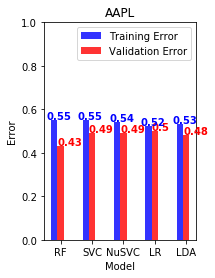

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


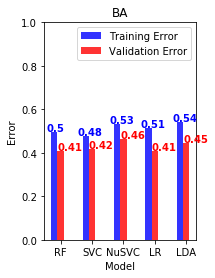

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


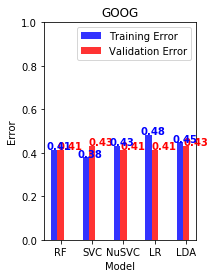

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


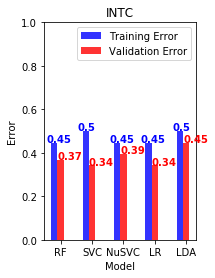

C:\Users\lxmxl\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


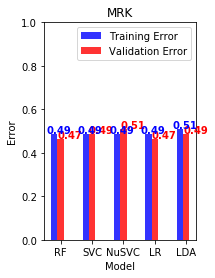

In [46]:
companies = ['AAPL', 'BA', 'GOOG', 'INTC', 'MRK']
for company in companies:
    # Load data
    
    newsData = pd.read_csv("News/" + company + ".csv", encoding = "ISO-8859-1")
    stockData = pd.read_csv("Prices/label_" + company + ".csv")
    t_dates = get_trading_date(newsData)
    newsData['trading_date'] = t_dates
    
    X, y = extractFeatures(newsData, stockData)
    
    # Train, test and plot
    trainAndValidate(X, y, company, 2)
    plt.show()